## **A Comparative Study of LDA and BERT-Based Topic Modeling on Indonesian YouTube Protest Discourse**
#### an research for analyzing the performance of LDA and BERTopic on topic modelling for youtube comments for Indonesian DPR Dissolution Protest 

##### *Preprocessing & EDA*

In [ ]:
# Library import

import pandas as pd
import matplotlib.pyplot as plt
import re
import random
import nltk
import pickle
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [ ]:
df=pd.read_csv("ytc_raw.csv")
df

In [ ]:
len(df)

10949

In [ ]:
def process(text_series):
    tokenized_texts = []
    clean_texts = []

    for text in text_series:
        # 1. lowercasing
        text = str(text).lower()

        # 2. removing possible link
        text = re.sub(r'http\S+|www\S+', '', text)

        #3. remove non alphabetic chars (symbol, numbers)
        text = re.sub(r'[^a-zA-Z\s]', ' ', text)

        # 4. normalizing white text, from a   a -> a a
        text = re.sub(r'\s+', ' ', text).strip()


        # Tokenization for LDA
        tokens = word_tokenize(text)
        tokens = [t for t in tokens if len(t) > 2]

        # Saving results
        tokenized_texts.append(tokens)
        clean_texts.append(" ".join(tokens))

    return tokenized_texts, clean_texts


In [7]:
tokenized_texts, clean_texts = process(df['Comments'])

In [9]:
tokenized_texts

[['ahok',
  'ponternya',
  'cuma',
  'kowar',
  'memang',
  'kebiasaan',
  'kader',
  'pdip',
  'wakti',
  'gubernur',
  'mana',
  'kerjanya'],
 ['ahok',
  'harus',
  'perbaiki',
  'dari',
  'dalam',
  'pdip',
  'karena',
  'dpr',
  'terbanyak',
  'senayan',
  'itu',
  'pdip',
  'dan',
  'ketua',
  'dpr',
  'itu',
  'dari',
  'pdip'],
 ['ngomong',
  'aja',
  'ahok',
  'pemerintah',
  'prabowo',
  'tdk',
  'ada',
  'benar',
  'buatnya',
  'pdhl',
  'pemerintahan',
  'prabowo',
  'warisan',
  'presiden',
  'sebelumnya',
  'imbasnya',
  'bpk',
  'presiden',
  'prabowo',
  'salahkan',
  'andaikan',
  'presidennya',
  'akan',
  'tangkap',
  'beliau',
  'krn',
  'tukang',
  'fitnah',
  'dan',
  'profokator'],
 ['pembrotak',
  'hok',
  'cino',
  'zionis',
  'komunis',
  'pembrotak',
  'menantang',
  'dan',
  'pemerintah',
  'benar',
  'benar',
  'cino',
  'babi',
  'komunis',
  'ini',
  'bisa',
  'memandulkan',
  'angkatan',
  'perangnya',
  'pembela',
  'rakyat',
  'indonesia'],
 ['kalau',
 

In [10]:
print(clean_texts)

['ahok ponternya cuma kowar memang kebiasaan kader pdip wakti gubernur mana kerjanya', 'ahok harus perbaiki dari dalam pdip karena dpr terbanyak senayan itu pdip dan ketua dpr itu dari pdip', 'ngomong aja ahok pemerintah prabowo tdk ada benar buatnya pdhl pemerintahan prabowo warisan presiden sebelumnya imbasnya bpk presiden prabowo salahkan andaikan presidennya akan tangkap beliau krn tukang fitnah dan profokator', 'pembrotak hok cino zionis komunis pembrotak menantang dan pemerintah benar benar cino babi komunis ini bisa memandulkan angkatan perangnya pembela rakyat indonesia', 'kalau konoha pemimpin nonis dilarang jadi wajar mereka banyakan pasti iri dan denki pada angkuh meskipun mereka tidak komen disini', 'lebih seneng jika ahmad sahroni ganti pak ahok jadi dpr karna konsisten ama prinsip nya ketimbang dpr isi anak baru lantik kemaren sore ada pengalaman nya', 'pak ahok memang bukan beragama islam tapi kinerjanya lebih islami dibanding agama islam tapi korupsi saya sebagai warga 

In [11]:
all_text = " ".join(clean_texts)
all_text

'ahok ponternya cuma kowar memang kebiasaan kader pdip wakti gubernur mana kerjanya ahok harus perbaiki dari dalam pdip karena dpr terbanyak senayan itu pdip dan ketua dpr itu dari pdip ngomong aja ahok pemerintah prabowo tdk ada benar buatnya pdhl pemerintahan prabowo warisan presiden sebelumnya imbasnya bpk presiden prabowo salahkan andaikan presidennya akan tangkap beliau krn tukang fitnah dan profokator pembrotak hok cino zionis komunis pembrotak menantang dan pemerintah benar benar cino babi komunis ini bisa memandulkan angkatan perangnya pembela rakyat indonesia kalau konoha pemimpin nonis dilarang jadi wajar mereka banyakan pasti iri dan denki pada angkuh meskipun mereka tidak komen disini lebih seneng jika ahmad sahroni ganti pak ahok jadi dpr karna konsisten ama prinsip nya ketimbang dpr isi anak baru lantik kemaren sore ada pengalaman nya pak ahok memang bukan beragama islam tapi kinerjanya lebih islami dibanding agama islam tapi korupsi saya sebagai warga indonesia dan agama

In [11]:
with open("LDA-dataset.pkl", "wb") as f:
    pickle.dump(tokenized_texts, f)

with open("BERT-dataset.pkl", "wb") as f:
    pickle.dump(clean_texts, f)

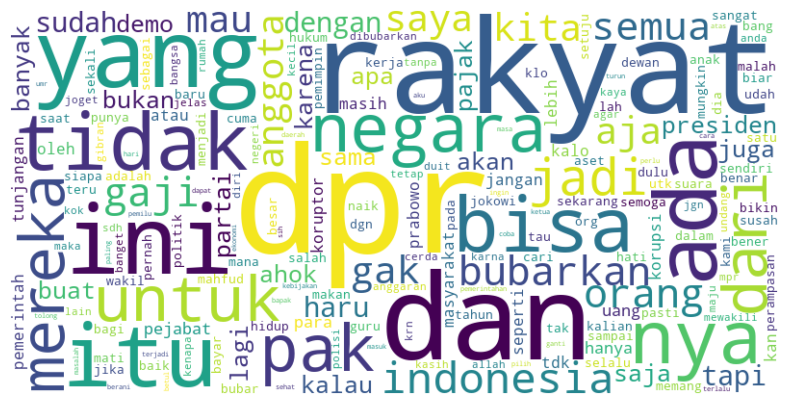

In [12]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    collocations=False  #no bigram system
).generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
df['char_length'] = df['Comments'].astype(str).apply(len)
df['word_length'] = df['Comments'].astype(str).apply(lambda x: len(x.split()))

df[['char_length', 'word_length']].describe()

,char_length,word_length
count,10949.000000,10949.000000
mean,127.034798,19.535026
std,178.595080,26.235443
min,1.000000,1.000000
25%,41.000000,7.000000
50%,78.000000,12.000000
75%,149.000000,23.000000
max,5321.000000,751.000000


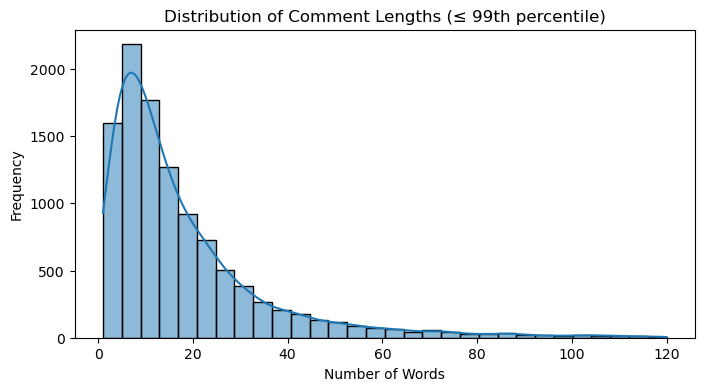

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

upper_bound = df['word_length'].quantile(0.99)

plt.figure(figsize=(8,4))
sns.histplot(
    data=df[df['word_length'] <= upper_bound],
    x='word_length',
    bins=30,
    kde=True
)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Comment Lengths (≤ 99th percentile)')
plt.show()


In [17]:
short_comments =df[df['word_length'] <= 5]
medium_comments = df[(df['word_length'] > 5) & (df['word_length'] <= 20)]
long_comments = df[df['word_length'] > 20]

print("Short comments (≤5 words):", len(short_comments))
print("Medium comments (6–20 words):", len(medium_comments))
print("Long comments (>20 words):", len(long_comments))


Short comments (≤5 words): 2146
Medium comments (6–20 words): 5596
Long comments (>20 words): 3207


In [18]:
from collections import Counter

all_tokens = [token for comment in tokenized_texts for token in comment]
word_freq = Counter(all_tokens)

word_freq.most_common(20)

[('dpr', 4614),
 ('rakyat', 4517),
 ('dan', 3778),
 ('ini', 2280),
 ('yang', 2245),
 ('itu', 1880),
 ('ada', 1823),
 ('tidak', 1555),
 ('bisa', 1431),
 ('nya', 1350),
 ('negara', 1305),
 ('pak', 1224),
 ('untuk', 1152),
 ('mereka', 1122),
 ('dari', 1102),
 ('jadi', 1044),
 ('indonesia', 1025),
 ('bubarkan', 931),
 ('orang', 911),
 ('gaji', 901)]

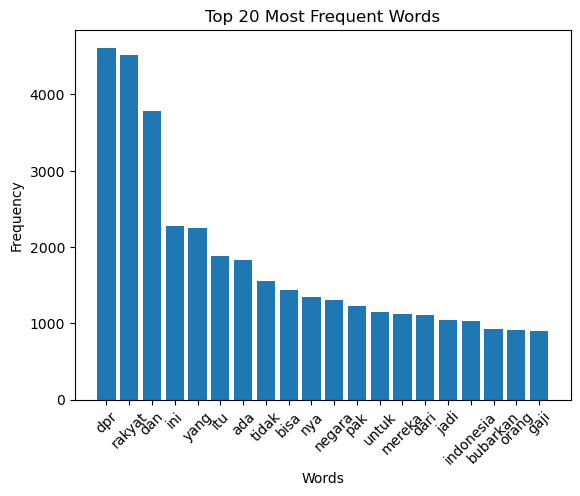

In [19]:
top_words = word_freq.most_common(20)
words, counts = zip(*top_words)

plt.figure()
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.show()


In [20]:
vocab_size = len(set(all_tokens))
total_tokens = len(all_tokens)

lexical_diversity = vocab_size / total_tokens

print("Vocabulary size:", vocab_size)
print("Total tokens:", total_tokens)
print("Lexical diversity:", lexical_diversity)


Vocabulary size: 18570
Total tokens: 195587
Lexical diversity: 0.0949449605546381


In [21]:
from nltk import bigrams

all_bigrams = list(bigrams(all_tokens))
bigram_freq = Counter(all_bigrams)

bigram_freq.most_common(15)


[(('anggota', 'dpr'), 522),
 (('bubarkan', 'dpr'), 448),
 (('pak', 'ahok'), 254),
 (('wakil', 'rakyat'), 238),
 (('pak', 'mahfud'), 222),
 (('rakyat', 'indonesia'), 217),
 (('dpr', 'itu'), 213),
 (('perampasan', 'aset'), 209),
 (('tidak', 'ada'), 196),
 (('negara', 'ini'), 180),
 (('dpr', 'dan'), 172),
 (('gaji', 'dpr'), 141),
 (('uang', 'rakyat'), 136),
 (('anggota', 'dewan'), 135),
 (('dpr', 'tidak'), 129)]